In [1]:
from palkiax import Palkiax

my_palkiax = Palkiax("weather_observations.csv")
print(my_palkiax.exog.index)
print(my_palkiax.endog.index)

RangeIndex(start=0, stop=287, step=1)
RangeIndex(start=0, stop=287, step=1)


In [2]:
my_palkiax.train()

/home/chloekoee/imc/mockBomex/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/home/chloekoee/imc/mockBomex/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


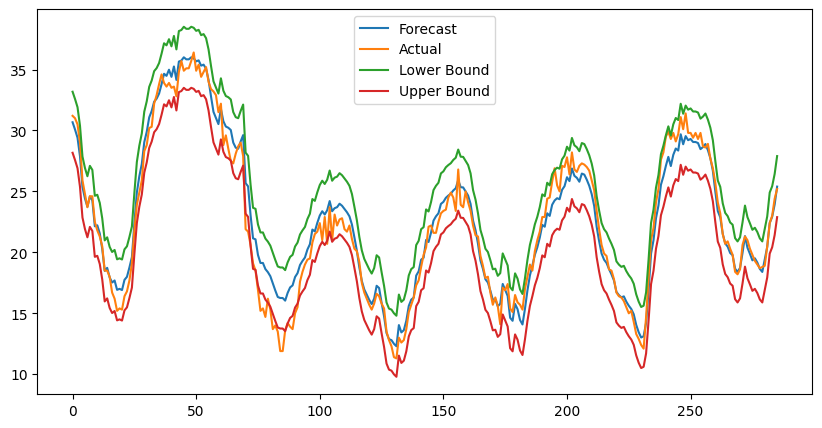

0      33.177808
1      32.576350
2      31.908081
3      30.387754
4      27.865024
         ...    
283    25.425654
284    26.428056
285    27.898298
286    29.368541
287          NaN
Name: conf_lb, Length: 288, dtype: float64

In [3]:
my_palkiax.save_prediction_plot(lb = 0, ub= my_palkiax.n-2)

my_palkiax.df["conf_lb"] 

In [4]:
my_palkiax.df["conf_lb"].head() 


0    33.177808
1    32.576350
2    31.908081
3    30.387754
4    27.865024
Name: conf_lb, dtype: float64

In [7]:
import pandas as pd

my_palkiax.exog.index

forecast_exog = {'humidity': [17],
        'temperature': [21.5]}

# Calculate the starting point and range
start_idx = my_palkiax.exog.index[-1] + 1  # Start after the current maximum index
end_idx = start_idx + len(forecast_exog["humidity"])  # Length of the new exog data

# Create a RangeIndex
new_index = pd.RangeIndex(start=start_idx, stop=end_idx, step=1)

# Update the exog DataFrame with the new index
forecast_exog_df = pd.DataFrame(forecast_exog, index=new_index)

print(my_palkiax.forecast(exog = forecast_exog_df, steps = 1))

{'value': 17.985803711306623, 'confidence': {'lower apparent_temperature': 16.66246119049595, 'upper apparent_temperature': 19.309146232117296}}


Time index of latest observed endogenous data

In [6]:
# my_palkiax.results.data.exog.shape
my_palkiax.results.data.row_labels

RangeIndex(start=0, stop=287, step=1)